In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("india_dataset.csv")

information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           200 non-null    object
 1   title              200 non-null    object
 2   publishedAt        200 non-null    object
 3   channelId          200 non-null    object
 4   channelTitle       200 non-null    object
 5   categoryId         200 non-null    int64 
 6   trending_date      200 non-null    object
 7   tags               200 non-null    object
 8   view_count         200 non-null    int64 
 9   likes              200 non-null    int64 
 10  dislikes           200 non-null    int64 
 11  comment_count      200 non-null    int64 
 12  thumbnail_link     200 non-null    object
 13  comments_disabled  200 non-null    bool  
 14  ratings_disabled   200 non-null    bool  
 15  description        197 non-null    object
dtypes: bool(2), int64(5), object(9)
memory usage

Summary statistics about the data

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
categoryId,200.0,22.165,6.194322e+00,1.0,23.00,24.0,25.00,43.0
view_count,200.0,900165.620,2.074336e+06,17385.0,91205.50,300878.5,918713.25,20974681.0
likes,200.0,22255.265,4.815042e+04,0.0,1216.75,4032.0,18895.50,394751.0
dislikes,200.0,1299.290,3.357447e+03,0.0,94.00,378.5,919.75,27719.0
comment_count,200.0,2271.990,5.967078e+03,0.0,128.25,559.0,1858.50,51540.0


In [5]:
df.loc[0]

video_id                                                   rxdXLCHtRjs
title                Manzoor-e-Khuda Song Teaser | Thugs Of Hindost...
publishedAt                                   2018-10-31T06:38:01.000Z
channelId                                     UCbTLwN10NoCU4WDzLf1JMOA
channelTitle                                                       YRF
categoryId                                                          10
trending_date                                                 18.01.11
tags                 Aamir Khan|Amitabh Bachchan|Katrina Kaif|Fatim...
view_count                                                     3341762
likes                                                            53961
dislikes                                                          5321
comment_count                                                     4689
thumbnail_link          https://i.ytimg.com/vi/rxdXLCHtRjs/default.jpg
comments_disabled                                                False
rating

In [6]:
df.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

FIXING DATATYPES:
              Fixing the datatypes so that the manipulation can be done easier and more manageable

In [7]:
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=df[i].astype(str)

In [8]:
type(df.video_id[0])

str

Generate year,month,date for further analysis in the column trending date

In [9]:
df["trending_date"]

0      18.01.11
1      18.01.11
2      18.01.11
3      18.01.11
4      18.01.11
         ...   
195    18.01.11
196    18.01.11
197    18.01.11
198    18.01.11
199    18.01.11
Name: trending_date, Length: 200, dtype: object

In [10]:
df["trending_date"]=pd.to_datetime(df["trending_date"])

In [11]:
df["trending_date"].sample(5)

152   2011-01-18
71    2011-01-18
90    2011-01-18
140   2011-01-18
100   2011-01-18
Name: trending_date, dtype: datetime64[ns]

In [12]:
df["year"]=df["trending_date"].dt.year
df["month"]=df["trending_date"].dt.month
df["day"]=df["trending_date"].dt.day

In [13]:
df[["year","month","day"]].sample(5)

,year,month,day
150,2011,1,18
53,2011,1,18
60,2011,1,18
83,2011,1,18
57,2011,1,18


In [14]:
for i in df.columns:
    if df[i].dtype=="bool":
        df[i]=df[i].astype("category")

In [15]:
df.dtypes

video_id                     object
title                        object
publishedAt                  object
channelId                    object
channelTitle                 object
categoryId                    int64
trending_date        datetime64[ns]
tags                         object
view_count                    int64
likes                         int64
dislikes                      int64
comment_count                 int64
thumbnail_link               object
comments_disabled          category
ratings_disabled           category
description                  object
year                          int64
month                         int64
day                           int64
dtype: object

In [16]:
df["publishedAt"]=pd.to_datetime(df["publishedAt"])

In [17]:
df["publishedAt"].sample(5)

53    2018-10-30 12:06:14+00:00
169   2018-10-30 05:19:58+00:00
176   2018-10-30 07:54:13+00:00
122   2018-10-26 18:31:51+00:00
137   2018-10-27 16:17:58+00:00
Name: publishedAt, dtype: datetime64[ns, UTC]

In [18]:
df["published_date"]=df["publishedAt"].dt.date

In [19]:
df["published_date"].sample(5)

164    2018-10-29
136    2018-10-31
176    2018-10-30
78     2018-10-30
89     2018-10-31
Name: published_date, dtype: object

In [20]:
df["published_time"]=df["publishedAt"].dt.time

In [21]:
df["published_time"].sample(5)

100    23:28:29
102    10:00:59
176    07:54:13
145    09:57:17
12     14:21:50
Name: published_time, dtype: object

In [29]:
df["video_id"].duplicated().value_counts()

False    200
Name: video_id, dtype: int64

In [22]:
df.set_index(df.video_id,inplace=True)

In [23]:
df.sample(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,year,month,day,published_date,published_time
video_id,,,,,,,,,,,,,,,,,,,,,
slEisss3r_A,slEisss3r_A,7 AM | ETV Telugu News | 31st October 2018,2018-10-31 02:34:11+00:00,UCJi8M0hRKjz8SLPvJKEVTOg,ETV Andhra Pradesh,25,2011-01-18,ETV|ETV Telugu|ETV NewsVideo|National News Vid...,175982,1095,...,111,https://i.ytimg.com/vi/slEisss3r_A/default.jpg,False,False,7 AM | ETV Telugu News | 31st October 2018,2011,1,18,2018-10-31,02:34:11
yOAGnmNPlAo,yOAGnmNPlAo,Khajur bhai ni moj - ખજૂર મજુર - gujju comedy ...,2018-10-28 04:36:13+00:00,UC-DQKF5d9LLVrRDnDmAkNSA,Khajur Bhai Ni Moj,23,2011-01-18,khajur bhai ni moj|khajur bhai video|gujju com...,602250,8546,...,336,https://i.ytimg.com/vi/yOAGnmNPlAo/default.jpg,False,False,1. Get the app here: http://bit.ly/KhajurDiwal...,2011,1,18,2018-10-28,04:36:13
QQQkBzHXWD4,QQQkBzHXWD4,Sembaruthi Today Full Episode 30.10.18 Promo R...,2018-10-30 04:26:31+00:00,UCu37EYTCokmDZhxFAQ5prGA,Apple TV,22,2011-01-18,zee Tamil|zee tv|zee tamil tv serials|zee tami...,78224,533,...,95,https://i.ytimg.com/vi/QQQkBzHXWD4/default.jpg,False,False,#sembaruthi#zeetamil#sembaruthiserialCredits -...,2011,1,18,2018-10-30,04:26:31
JjbEgQ4xwps,JjbEgQ4xwps,Live: IND Vs WI 4th ODI | Live Scores and Comm...,2018-10-29 17:21:11+00:00,UCJrpiw6dS09Zx2Z8d9AFWDA,CricTalks,17,2011-01-18,india score|india match|cricket score|live sco...,1632330,6392,...,26,https://i.ytimg.com/vi/JjbEgQ4xwps/default.jpg,False,False,Live: IND Vs WI 4th ODI | Live Scores and Comm...,2011,1,18,2018-10-29,17:21:11
uzbnYn6Z2WM,uzbnYn6Z2WM,Statue of Unity: PM Narenda Modi performs 'Ras...,2018-10-31 08:33:54+00:00,UCIvaYmXn910QMdemBG3v1pQ,Zee News,25,2011-01-18,Zee News|Modi|PM Modi|narendra modi|statue of ...,261578,3406,...,459,https://i.ytimg.com/vi/uzbnYn6Z2WM/default.jpg,False,False,Prime Minister Narendra Modi has unveiled the ...,2011,1,18,2018-10-31,08:33:54


EXAMINING MISSING VALUES:

In [30]:
df.isnull().sum().to_frame()

,0
video_id,0
title,0
publishedAt,0
channelId,0
channelTitle,0
categoryId,0
trending_date,0
tags,0
view_count,0
likes,0


<AxesSubplot:ylabel='video_id'>

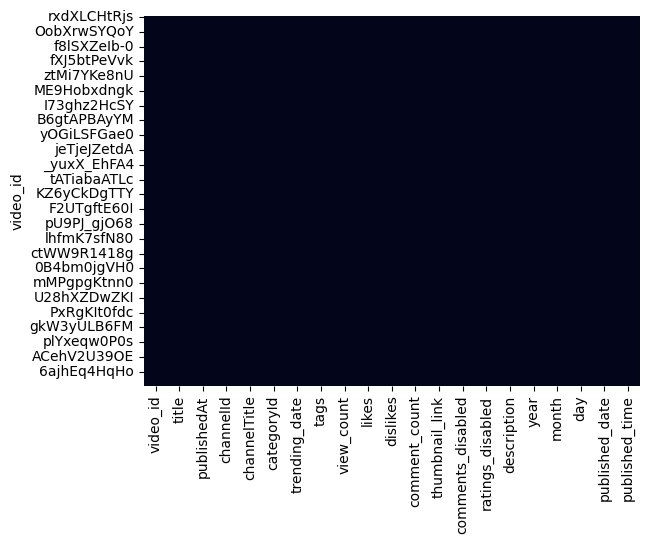

In [33]:
import seaborn  as sns
sns.heatmap(df.isnull(),cbar=False)